In [50]:
import geopandas as gpd
import numpy as np
import shapely.geometry
from shapely.geometry import Point
import shapely.ops
import shapely
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [22]:
nibrs_df = pd.read_csv('crime_data/nibrs_thru_dec_2023.csv')
nibrs_df

C:\Users\diper\AppData\Local\Temp\ipykernel_12136\382449808.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  nibrs_df = pd.read_csv('crime_data/nibrs_thru_dec_2023.csv')


,inci_id,date_inc,time_inc,offense,nibrs_grp,nibrs_code,beat,district,neighborhood,latitude,longitude,incidentlocation,locationStreet2_Apt,city,state,zip
0,21000002,1/1/2021,02:00.0,MISCELLANEOUS WEAPON VIOLATION,A,520,422,4.0,36,38.629573,-90.204995,1700 CHESTNUT ST,NaN,Saint Louis,MO,NaN
1,21000003,1/1/2021,09:00.0,MISCELLANEOUS WEAPON VIOLATION,A,520,521,5.0,38,38.641221,-90.264226,4961 LACLEDE AVE,210,Saint Louis,MO,63108.0
2,21000003,1/1/2021,09:00.0,PROPERTY DAMAGE,A,290,521,5.0,38,38.641221,-90.264226,4961 LACLEDE AVE,210,Saint Louis,MO,63108.0
3,21000007,1/1/2021,10:00.0,PROPERTY DAMAGE - 2ND DEGREE,A,290,223,2.0,9,38.598725,-90.310722,6963 PERNOD AVE,NaN,Saint Louis,MO,63139.0
4,21000008,1/1/2021,20:00.0,MISCELLANEOUS WEAPON VIOLATION,A,520,126,1.0,16,38.579494,-90.243210,3500 KINGSLAND CT,NaN,Saint Louis,MO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173359,24000551,12/31/2023,00:00.0,DESTRUCTION OF PRIVATE PROPERTY (CITY CHARGE),A,290,CITY1,1.0,16,38.587915,-90.252870,3920 DUNNICA AVE,NaN,Saint Louis,MO,NaN
173360,24000557,12/31/2023,00:00.0,DESTRUCTION OF PRIVATE PROPERTY (CITY CHARGE),A,290,627,6.0,68,38.677708,-90.217160,2007 E FAIR AVE,NaN,Saint Louis,MO,NaN
173361,24000591,12/31/2023,00:00.0,DISCHARGING FIREARM WITHIN CITY,A,520,127,1.0,3,38.569796,-90.254490,5516 GRACE AVE,NaN,Saint Louis,MO,NaN
173362,24000629,12/31/2023,00:00.0,STEALING UNDER $150 (PETTY LARCENY-MOTOR VEH P...,A,23G,CITY4,4.0,36,38.630687,-90.201630,1500 OLIVE ST,NaN,Saint Louis,MO,NaN


In [24]:
nghbrhd_list = ['16', '17', '19', '30']
mask = nibrs_df['neighborhood'].isin(nghbrhd_list)
nbhd_nibrs_df = nibrs_df[mask]
nbhd_nibrs_df

,inci_id,date_inc,time_inc,offense,nibrs_grp,nibrs_code,beat,district,neighborhood,latitude,longitude,incidentlocation,locationStreet2_Apt,city,state,zip
4,21000008,1/1/2021,20:00.0,MISCELLANEOUS WEAPON VIOLATION,A,520,126,1.0,16,38.579494,-90.243210,3500 KINGSLAND CT,NaN,Saint Louis,MO,NaN
5,21000008,1/1/2021,20:00.0,PROPERTY DAMAGE - 2ND DEGREE,A,290,126,1.0,16,38.579494,-90.243210,3500 KINGSLAND CT,NaN,Saint Louis,MO,NaN
11,21000032,1/1/2021,52:00.0,LEAVING THE SCENE OF A MOTOR VEHICLE ACCIDENT,B,90Z,127,1.0,16,38.571658,-90.251776,S GRAND BLVD,LIERMANN AVE,Saint Louis,MO,63116.0
37,21000075,1/1/2021,37:00.0,RESISTING ARREST/DETENTION/STOP BY FLEEING - C...,B,90Z,322,3.0,16,38.588583,-90.244290,CHIPPEWA ST,S GRAND BLVD,Saint Louis,MO,NaN
38,21000077,1/1/2021,20:00.0,BURGLARY - 2ND DEGREE,A,220,321,3.0,19,38.594003,-90.229134,2733 CHEROKEE ST,NaN,Saint Louis,MO,63118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173311,23059360,12/31/2023,30:00.0,PROPERTY DAMAGE - 2ND DEGREE,A,290,127,1.0,16,38.584574,-90.250810,3891 MERAMEC ST,203,Saint Louis,MO,NaN
173312,23059365,12/31/2023,11:00.0,POSSESSION OF CONTROLLED SUBSTANCE,A,35A,322,3.0,16,38.581622,-90.243918,4130 S. GRAND BOULEVARD,NaN,Saint Louis,MO,63118
173315,23059375,12/31/2023,45:00.0,ASSAULT 1ST DEGREE OR ATTEMPT,A,13A,323,3.0,19,38.588943,-90.239015,3716 VIRGINIA AVE,NaN,Saint Louis,MO,63118
173336,24000111,12/31/2023,00:00.0,DISCHARGING FIREARM WITHIN CITY,A,520,125,1.0,17,38.572195,-90.235080,4625 OREGON AVE,NaN,Saint Louis,MO,NaN


In [30]:
dec_nbhd_nibrs_df = nbhd_nibrs_df[nbhd_nibrs_df['date_inc'].str.contains('12/.*/2023', regex=True)]
dec_nbhd_nibrs_df

,inci_id,date_inc,time_inc,offense,nibrs_grp,nibrs_code,beat,district,neighborhood,latitude,longitude,incidentlocation,locationStreet2_Apt,city,state,zip
169214,23054789,12/1/2023,30:00.0,DOMESTIC ASSAULT - 4TH DEGREE - 1ST OR 2ND OFF...,A,13B,322,3.0,16,38.580655,-90.237070,4142 MINNESOTA AVE,NaN,Saint Louis,MO,NaN
169215,23054789,12/1/2023,30:00.0,PROPERTY DAMAGE - 2ND DEGREE,A,290,322,3.0,16,38.580655,-90.237070,4142 MINNESOTA AVE,NaN,Saint Louis,MO,NaN
169236,23054855,12/1/2023,45:00.0,GENERAL PEACE DISTURBANCE,B,90C,128,1.0,16,38.589323,-90.257103,4101 GRAVOIS AVE,NaN,Saint Louis,MO,NaN
169237,23054864,12/1/2023,45:00.0,DESTRUCTION OF PRIVATE PROPERTY (CITY CHARGE),A,290,125,1.0,17,38.577227,-90.234310,4318 OREGON AVE,NaN,Saint Louis,MO,NaN
169238,23054864,12/1/2023,45:00.0,UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...,A,520,125,1.0,17,38.577227,-90.234310,4318 OREGON AVE,NaN,Saint Louis,MO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173311,23059360,12/31/2023,30:00.0,PROPERTY DAMAGE - 2ND DEGREE,A,290,127,1.0,16,38.584574,-90.250810,3891 MERAMEC ST,203,Saint Louis,MO,NaN
173312,23059365,12/31/2023,11:00.0,POSSESSION OF CONTROLLED SUBSTANCE,A,35A,322,3.0,16,38.581622,-90.243918,4130 S. GRAND BOULEVARD,NaN,Saint Louis,MO,63118
173315,23059375,12/31/2023,45:00.0,ASSAULT 1ST DEGREE OR ATTEMPT,A,13A,323,3.0,19,38.588943,-90.239015,3716 VIRGINIA AVE,NaN,Saint Louis,MO,63118
173336,24000111,12/31/2023,00:00.0,DISCHARGING FIREARM WITHIN CITY,A,520,125,1.0,17,38.572195,-90.235080,4625 OREGON AVE,NaN,Saint Louis,MO,NaN


In [33]:
bpw = dec_nbhd_nibrs_df[dec_nbhd_nibrs_df['neighborhood'] == '30']
bpw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 169331 to 173291
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inci_id              43 non-null     int64  
 1   date_inc             43 non-null     object 
 2   time_inc             43 non-null     object 
 3   offense              43 non-null     object 
 4   nibrs_grp            43 non-null     object 
 5   nibrs_code           43 non-null     object 
 6   beat                 43 non-null     object 
 7   district             43 non-null     float64
 8   neighborhood         43 non-null     object 
 9   latitude             43 non-null     float64
 10  longitude            43 non-null     float64
 11  incidentlocation     43 non-null     object 
 12  locationStreet2_Apt  5 non-null      object 
 13  city                 43 non-null     object 
 14  state                43 non-null     object 
 15  zip                  16 non-null     o

In [34]:
gp = dec_nbhd_nibrs_df[dec_nbhd_nibrs_df['neighborhood'] == '19']
gp

,inci_id,date_inc,time_inc,offense,nibrs_grp,nibrs_code,beat,district,neighborhood,latitude,longitude,incidentlocation,locationStreet2_Apt,city,state,zip
169272,23054905,12/1/2023,40:00.0,LEAVING THE SCENE OF A MOTOR VEHICLE ACCIDENT,B,90Z,323,3.0,19,38.588932,-90.234629,WINNEBAGO ST,LOUISIANA AVE,Saint Louis,MO,63118
169321,23055027,12/1/2023,00:00.0,BURGLARY - 2ND DEGREE,A,220,322,3.0,19,38.591820,-90.241163,3553 TENNESSEE AVE,NaN,Saint Louis,MO,63118
169391,23054989,12/2/2023,10:00.0,TRESPASSING ON PRIVATE PROPERTY,B,90J,322,3.0,19,38.591027,-90.240910,3614 TENNESSEE AVE,NaN,Saint Louis,MO,63118
169392,23054989,12/2/2023,10:00.0,STEALING UNDER $150 (PETTY LARCENY - OTHER),A,23H,322,3.0,19,38.591027,-90.240910,3614 TENNESSEE AVE,NaN,Saint Louis,MO,63118
169412,23055024,12/2/2023,20:00.0,STEALING,A,23D,CITY3,3.0,19,38.602348,-90.230108,2851 GRAVOIS AVE,NaN,Saint Louis,MO,63118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172861,23058719,12/27/2023,50:00.0,LEAVING THE SCENE OF A MOTOR VEHICLE ACCIDENT,B,90Z,322,3.0,19,38.588932,-90.234629,TENNESSEE ST/ WINNEBAGO ST,NaN,Saint Louis,MO,63118
172915,23058844,12/27/2023,00:00.0,STEALING UNDER $150 (PETTY LARCENY - MOTOR VEH...,A,23G,CITY3,3.0,19,38.592803,-90.228153,3427 OHIO AVE,NaN,Saint Louis,MO,63118
173179,23059139,12/30/2023,45:00.0,DISCHARGING FIREARM WITHIN CITY (SHOTSPOTTER),A,520,323,3.0,19,38.593012,-90.238444,3300 POTOMAC AVE,NaN,Saint Louis,MO,NaN
173212,23059217,12/30/2023,50:00.0,TRESPASSING ON PRIVATE PROPERTY,B,90J,321,3.0,19,38.590583,-90.228837,2711 MIAMI,NaN,Saint Louis,MO,63118


In [52]:
gp_geo = gp[['latitude','longitude']]
gp_geo['points'] = [Point(xy) for xy in zip(gp_geo['longitude'], gp_geo['latitude'])]
gp_geo.reset_index(drop=True, inplace=True)
gp_geo

C:\Users\diper\AppData\Local\Temp\ipykernel_12136\4262088894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_geo['points'] = [Point(xy) for xy in zip(gp_geo['longitude'], gp_geo['latitude'])]


,latitude,longitude,points
0,38.588932,-90.234629,POINT (-90.234629 38.588932)
1,38.591820,-90.241163,POINT (-90.241163 38.59182)
2,38.591027,-90.240910,POINT (-90.24091 38.591027)
3,38.591027,-90.240910,POINT (-90.24091 38.591027)
4,38.602348,-90.230108,POINT (-90.230108 38.602348)
...,...,...,...
83,38.588932,-90.234629,POINT (-90.234629 38.588932)
84,38.592803,-90.228153,POINT (-90.228153 38.592803)
85,38.593012,-90.238444,POINT (-90.238444 38.593012)
86,38.590583,-90.228837,POINT (-90.228837 38.590583)


In [20]:
df = gpd.read_file("gj_area.shx")
df

,geometry
0,"POLYGON ((-90.22300 38.60493, -90.22799 38.581..."


<Axes: >

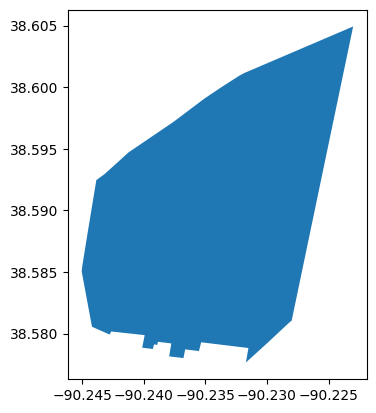

In [16]:
df.plot()

In [54]:
df.contains(gp_geo['points'][:])

TypeError: (<class 'geopandas.geoseries.GeoSeries'>, <class 'pandas.core.series.Series'>)

In [53]:
shapely.intersects(df, gp_geo['points'])

TypeError: Series.reindex() got an unexpected keyword argument 'columns'